In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
data_path = '../../data/SI_Fig04'
lc_list = [
        'evergreen',
        'deciduous',
        'Shrublands',
        'Grasslands',
        ]
timing_list = [
        'early',
        'mid',
        'late',
]

lytools version 0.0.47


In [2]:
def vars_RF_with_winter():
    variables = \
        '''
        current_sos_std_anomaly
        post_PRE
        post_VPD
        dormant_length
        dormant_SWE_Terra
        dormant_TMP
        NDVI_pre_6_mean
        MA_TMP
        lag
        PRE_pre_6_mean
        drought_year_sos_anomaly
        water_balance
        MA_PRE
        CV_PRE
        CV_TMP
        VPD_pre_6_mean
        PRE_lag_mean
        VPD_lag_mean
        correlation
        sand
        '''
    vars_list = variables.split()
    return vars_list

def vars_RF_no_winter():
    variables = \
        '''
        post_PRE
        post_VPD
        NDVI_pre_6_mean
        MA_TMP
        current_sos_anomaly
        VPD_lag_mean
        PRE_pre_6_mean
        VPD_pre_6_mean
        PRE_lag_mean
        water_balance
        MA_PRE
        CV_PRE
        CV_TMP
        correlation
        sand
        '''
    vars_list = variables.split()
    return vars_list


In [3]:
def corr_to_color(corr,xmin=-0.4,xmax=0.4,color_class=256):
    if np.isnan(corr):
        corr = 0.
    corr_range = np.linspace(xmin, xmax, color_class)
    if corr < xmin:
        pos_indx = 0
    elif corr > xmax:
        pos_indx = len(corr_range) - 1
    else:
        pos_indx = int(round(((corr - xmin) / (xmax - xmin) * len(corr_range)), 0)) - 1

    cmap = sns.diverging_palette(236, 0, s=99, l=50, n=color_class, center="light")
    c = cmap[pos_indx]
    return c


In [16]:
def plot_SI_fig4():
    var_list_0 = vars_RF_no_winter()
    var_list_1 = vars_RF_with_winter()
    var_list_all = [var_list_0, var_list_1]
    df_fname_list = ['SR.df','MR.df']
    for winter in [0, 1]:
        var_list = var_list_all[winter]
        var_list = var_list[::-1]
        result_dataframe = Tools().load_df(join(data_path, df_fname_list[winter]))
        for timing in timing_list:
            if winter == 0 and timing == 'late':
                continue
            plt.figure(figsize=(4, 10))
            y = 0
            for lc in lc_list:
                key = f'{timing}-{lc}'
                result_dataframe_i = result_dataframe[result_dataframe['__key__']==key]
                result_dic = Tools().df_to_dic(result_dataframe_i, '__key__')
                result_dic = result_dic[key]
                x = 0
                for var in var_list:
                    if not var in result_dic:
                        imp = np.nan
                    else:
                        r = result_dic[var]
                        color = corr_to_color(r)
                        plt.scatter(y, x, marker='s', alpha=1, color=color, zorder=0, s=400)
                    x += 1
                y += 1
                plt.yticks(list(range(len(var_list))), var_list)
                plt.xticks(list(range(len(lc_list))), lc_list, rotation=90)
                plt.axis('equal')
                plt.title(timing + f' {df_fname_list[winter][:-3]}')
                plt.tight_layout()
    plt.show()



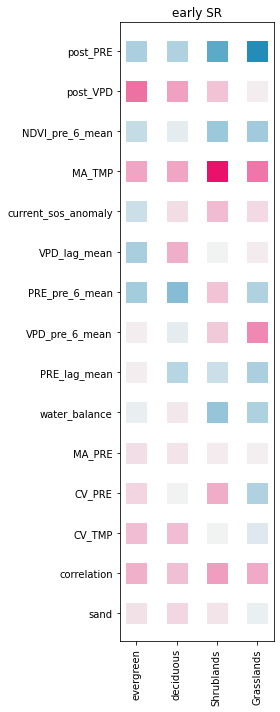

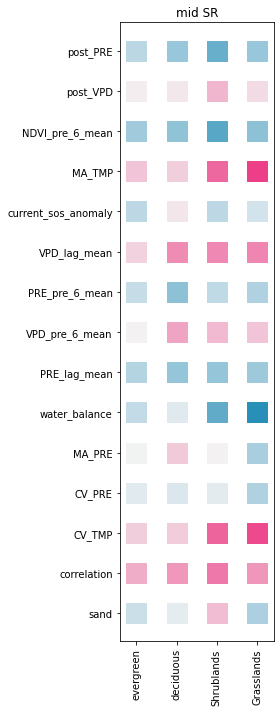

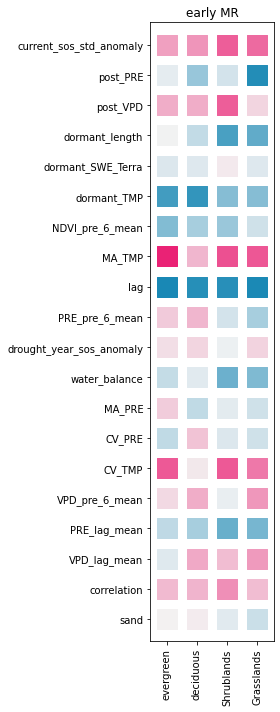

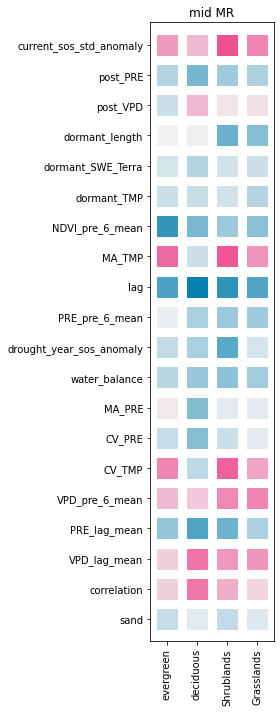

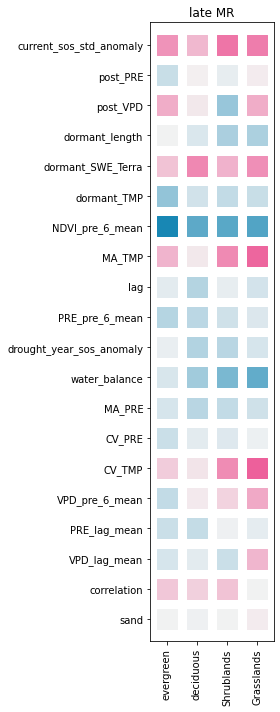

In [17]:
plot_SI_fig4()